# Zad.

* Wykona kernelową estymację gęstości 2D.
* Dobierz odpowiednią szerokość okna.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import cluster, datasets

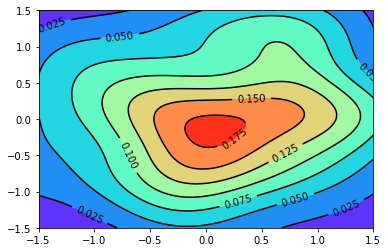

In [2]:
data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = data[:, 0]
y = data[:, 1]
xmin, xmax = -1.5,1.5
ymin, ymax = -1.5, 1.5

# siatka [xmin:xmax] x [ymin:ymax] rozm 100 x 100 (uzyskiwanie jej sposob 3)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

# wartosci do estymacji jadrowej
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)

# obraz estymacji jadrowej dla siatki
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot (tlo poziomicy)
cfset = ax.contourf(xx, yy, f, cmap='rainbow')

# Contour plot (obwody poziomicy)
cset = ax.contour(xx, yy, f, colors='k')
# Label plot (wartosci do obwodow poziomicy)
ax.clabel(cset, inline=1, fontsize=10)

plt.show()

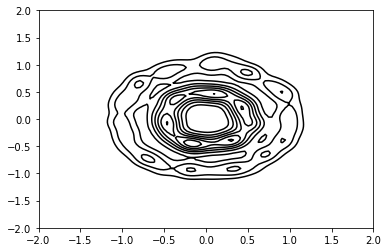

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import cluster, datasets
n_samples = 100
data, data_y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
xmin = -2
xmax = 2
ymin = -2
ymax = 2
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
k = st.gaussian_kde(data.T, bw_method= 0.2)
pos = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(k(pos).T, X.shape)
fig, ax = plt.subplots()
ax.contour(X, Y, Z, colors='k')
plt.show()